In [133]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [134]:
import os
import sys
from pathlib import Path

# check if workding_dir is in local variables
if "workding_dir" not in locals():
    workding_dir = str(Path.cwd().parent)

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/papers/rapget-translation


In [135]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/code/engd/papers/rapget-translation/.env


True

In [136]:
import os

model_name = os.getenv("MODEL_NAME")
adapter_name_or_path = os.getenv("ADAPTER_NAME_OR_PATH")
load_in_4bit = os.getenv("LOAD_IN_4BIT") == "true"
data_path = os.getenv("DATA_PATH")
results_path = "results/mac-results_rpp_with_mnt_2048.csv"  # os.getenv("RESULTS_PATH")
use_english_datasets = os.getenv("USE_ENGLISH_DATASETS") == "true"
max_new_tokens = int(os.getenv("MAX_NEW_TOKENS", 2048))

print(model_name, adapter_name_or_path, load_in_4bit, data_path, results_path, use_english_datasets, max_new_tokens)

Qwen/Qwen2-7B-Instruct None False datasets/mac/mac.tsv results/mac-results_rpp_with_mnt_2048.csv False 2048


In [137]:
import pandas as pd
from llm_toolkit.llm_utils import *
from llm_toolkit.translation_utils import *

df = pd.read_csv(results_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 44 columns):
 #   Column                                                            Non-Null Count  Dtype 
---  ------                                                            --------------  ----- 
 0   chinese                                                           1133 non-null   object
 1   english                                                           1133 non-null   object
 2   internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.00              1133 non-null   object
 3   internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.02              1133 non-null   object
 4   internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.04              1133 non-null   object
 5   internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.06              1133 non-null   object
 6   internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.08              1133 non-null   object
 7   internlm/internlm2_5-7b-chat/checkpoint-14

In [138]:
result_columns = [col for col in df.columns[2:].to_list() if "rpp" in col]
result_columns.sort()
result_columns

['Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.00',
 'Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.02',
 'Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.04',
 'Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.06',
 'Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.08',
 'Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.10',
 'Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.00',
 'Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.02',
 'Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.04',
 'Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.06',
 'Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.08',
 'Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.10',
 'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.00',
 'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.02',
 'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.04',
 'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.06',
 'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.08',
 'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.10',
 'microsoft/Phi-3.5-mini-instruct/checkp

In [139]:
columns = df.columns[:2].to_list() + result_columns
df = df[columns]
columns = df.columns.to_list()
result_columns = df.columns[2:].to_list()
result_columns, columns

(['Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.00',
  'Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.02',
  'Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.04',
  'Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.06',
  'Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.08',
  'Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.10',
  'Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.00',
  'Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.02',
  'Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.04',
  'Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.06',
  'Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.08',
  'Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.10',
  'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.00',
  'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.02',
  'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.04',
  'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.06',
  'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.08',
  'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.10',
  'microsoft/Phi-3.5-m

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 44 columns):
 #   Column                                                            Non-Null Count  Dtype 
---  ------                                                            --------------  ----- 
 0   chinese                                                           1133 non-null   object
 1   english                                                           1133 non-null   object
 2   Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.00                   1133 non-null   object
 3   Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.02                   1133 non-null   object
 4   Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.04                   1133 non-null   object
 5   Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.06                   1133 non-null   object
 6   Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.08                   1133 non-null   object
 7   Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp

In [141]:
variant = "rpp"
metrics_df = get_metrics(df, max_output_tokens=max_new_tokens, variant=variant)
metrics_df

['Qwen/Qwen2-72B-Instruct' 'Qwen/Qwen2-7B-Instruct'
 'internlm/internlm2_5-7b-chat' 'microsoft/Phi-3.5-mini-instruct'
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat'
 'shenzhi-wang/Llama3.1-8B-Chinese-Chat'
 'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat']
Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.00: {'meteor': 0.47892081926016034, 'sacrebleu': {'score': 18.953782447211417, 'counts': [14728, 6825, 3776, 2214], 'totals': [28290, 27157, 26024, 24895], 'precisions': [52.06079886885826, 25.131641933939683, 14.509683369197663, 8.893352078730668], 'bp': 0.9350441410013948, 'sys_len': 28290, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.18953782447211412, 'precisions': [0.5206079886885825, 0.25131641933939686, 0.14509683369197662, 0.0889335207873067], 'brevity_penalty': 0.9350441410013948, 'length_ratio': 0.937065253395164, 'translation_length': 28290, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.505641471965615, 'rouge2': 0.26650397564177, 'rougeL': 0.4521569211424892, 'rougeLsum': 0.45

model   rpp    meteor     spbleu  \
0                     Qwen/Qwen2-72B-Instruct  1.00  0.478921  18.953782   
1                     Qwen/Qwen2-72B-Instruct  1.02  0.479684  19.013749   
2                     Qwen/Qwen2-72B-Instruct  1.04  0.476363  18.520633   
3                     Qwen/Qwen2-72B-Instruct  1.06  0.467964  17.982474   
4                     Qwen/Qwen2-72B-Instruct  1.08  0.459758  17.067954   
5                     Qwen/Qwen2-72B-Instruct  1.10  0.451578  16.224522   
6                      Qwen/Qwen2-7B-Instruct  1.00  0.442241  14.388149   
7                      Qwen/Qwen2-7B-Instruct  1.02  0.440100  15.161723   
8                      Qwen/Qwen2-7B-Instruct  1.04  0.439014  14.958632   
9                      Qwen/Qwen2-7B-Instruct  1.06  0.432832  14.280874   
10                     Qwen/Qwen2-7B-Instruct  1.08  0.423561  13.659684   
11                     Qwen/Qwen2-7B-Instruct  1.10  0.413505  12.922650   
12               internlm/internlm2_5-7b-chat  1.00  0.429000  14.734882   
13               internlm/internlm2_5-7b-chat  1.02  0.426625  14.583817   
14               internlm/internlm2_5-7b-chat  1.04  0.415459  13.534659   
15               internlm/internlm2_5-7b-chat  1.06  0.403959  12.346741   
16               internlm/internlm2_5-7b-chat  1.08  0.387318  11.075675   
17               internlm/internlm2_5-7b-chat  1.10  0.376931  10.305164   
18            microsoft/Phi-3.5-mini-instruct  1.00  0.379683   8.712969   
19            microsoft/Phi-3.5-mini-instruct  1.02  0.378059  10.291240   
20            microsoft/Phi-3.5-mini-instruct  1.04  0.354716   8.966882   
21            microsoft/Phi-3.5-mini-instruct  1.06  0.329873   7.076233   
22            microsoft/Phi-3.5-mini-instruct  1.08  0.305454   5.105511   
23            microsoft/Phi-3.5-mini-instruct  1.10  0.290383   4.091959   
24     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.00  0.461111  17.879150   
25     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.02  0.457152  17.436885   
26     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.04  0.456047  17.440173   
27     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.06  0.452042  16.895233   
28     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.08  0.444211  16.166238   
29     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.10  0.437984  15.601723   
30      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.00  0.433633  15.209541   
31      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.02  0.432905  15.191022   
32      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.04  0.432048  15.051352   
33      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.06  0.427543  14.449131   
34      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.08  0.420663  13.933704   
35      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.10  0.411121  13.303738   
36  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.00  0.406834  13.565137   
37  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.02  0.406491  13.429876   
38  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.04  0.405486  13.295092   
39  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.06  0.401473  13.108608   
40  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.08  0.398702  12.850538   
41  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.10  0.393224  12.361162   

      bleu_1   rouge_l  ews_score  repetition_score  total_repetitions  \
0   0.189538  0.452157        0.0          0.098853           0.098853   
1   0.190137  0.451971        0.0          0.081200           0.081200   
2   0.185206  0.448942        0.0          0.105031           0.105031   
3   0.179825  0.441041        0.0          0.073257           0.073257   
4   0.170680  0.431745        0.0          0.047661           0.047661   
5   0.162245  0.424349        0.0          0.057370           0.057370   
6   0.143881  0.416165        0.0         12.812886          12.812886   
7   0.151617  0.416465        0.0          7.156222           7.156222   
8   0.149586  0.414371        0.0          0.185349           0.185349   
9   0.142809  0.407254        0

In [142]:
time_df = load_eval_times("logs", total_entries=len(df), variant=variant)
time_df

Loading content of logs/l40-1gpu-1.txt
Error processing log file: logs/l40-1gpu-1.txt
'utf-8' codec can't decode byte 0xe2 in position 0: unexpected end of data
Loading content of logs/l40-1gpu-2.txt
Loading content of logs/l40-1gpu-3.txt
Loading content of logs/l40-1gpu-4.txt
Loading content of logs/l40-1gpu-5.txt
Loading content of logs/l40-1gpu-epoch-1.txt
Loading content of logs/l40-1gpu-fine-tuned.txt
Loading content of logs/l40-1gpu-rpp-1.txt
Loading content of logs/l40-1gpu-rpp-2.txt
Loading content of logs/l40-1gpu-rpp-3.txt
Loading content of logs/l40-1gpu-rpp-4.txt
Loading content of logs/l40-4gpu-1.txt
Loading content of logs/l40-4gpu-2.txt
Loading content of logs/l40-4gpu-3.txt
Loading content of logs/l40-4gpu-4.txt
Loading content of logs/l40-4gpu-5.txt
Loading content of logs/l40-4gpu-6.txt
Loading content of logs/l40-4gpu-7.txt
Loading content of logs/l40-4gpu-8.txt
Loading content of logs/openai-gpt-4o-mini-fine-tuned.txt
Loading content of logs/openai-gpt-4o-mini.txt
L

model   rpp  eval_time
0             microsoft/Phi-3.5-mini-instruct  1.00   5.484554
1             microsoft/Phi-3.5-mini-instruct  1.02   2.633716
2             microsoft/Phi-3.5-mini-instruct  1.04   1.928508
3             microsoft/Phi-3.5-mini-instruct  1.06   1.315975
4             microsoft/Phi-3.5-mini-instruct  1.08   2.054722
5             microsoft/Phi-3.5-mini-instruct  1.10   1.963813
36               internlm/internlm2_5-7b-chat  1.00   3.063548
37               internlm/internlm2_5-7b-chat  1.02   2.127979
38               internlm/internlm2_5-7b-chat  1.04   2.136805
39               internlm/internlm2_5-7b-chat  1.06   2.153575
40               internlm/internlm2_5-7b-chat  1.08   2.148279
41               internlm/internlm2_5-7b-chat  1.10   2.172109
42                     Qwen/Qwen2-7B-Instruct  1.00   2.216240
43                     Qwen/Qwen2-7B-Instruct  1.02   1.586055
44                     Qwen/Qwen2-7B-Instruct  1.04   1.012357
45                     Qwen/Qwen2-7B-Instruct  1.06   1.002648
46                     Qwen/Qwen2-7B-Instruct  1.08   1.000883
47                     Qwen/Qwen2-7B-Instruct  1.10   1.011474
48  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.00   1.187114
49  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.02   1.810238
50  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.04   1.159753
51  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.06   1.165049
52  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.08   1.168579
53  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.10   1.156222
54      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.00   1.762577
55      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.02   1.749338
56      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.04   1.046778
57      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.06   1.045013
58      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.08   1.042365
59      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.10   1.045896
60     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.00  16.178288
61     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.02  15.968226
62     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.04  16.050309
63     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.06  15.972639
64     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.08  15.998235
65     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.10  16.018535
66                    Qwen/Qwen2-72B-Instruct  1.00  15.977935
67                    Qwen/Qwen2-72B-Instruct  1.02  15.785525
68                    Qwen/Qwen2-72B-Instruct  1.04  15.759047
69                    Qwen/Qwen2-72B-Instruct  1.06  15.851721
70                    Qwen/Qwen2-72B-Instruct  1.08  15.924095
71                    Qwen/Qwen2-72B-Instruct  1.10  15.984996

In [143]:
# Merge time_df into metrics_df
metrics_df.drop(columns=["eval_time"], inplace=True, errors="ignore")
metrics_df = pd.merge(metrics_df, time_df, on=["model", variant], how="left")
metrics_df

model   rpp    meteor     spbleu  \
0                     Qwen/Qwen2-72B-Instruct  1.00  0.478921  18.953782   
1                     Qwen/Qwen2-72B-Instruct  1.02  0.479684  19.013749   
2                     Qwen/Qwen2-72B-Instruct  1.04  0.476363  18.520633   
3                     Qwen/Qwen2-72B-Instruct  1.06  0.467964  17.982474   
4                     Qwen/Qwen2-72B-Instruct  1.08  0.459758  17.067954   
5                     Qwen/Qwen2-72B-Instruct  1.10  0.451578  16.224522   
6                      Qwen/Qwen2-7B-Instruct  1.00  0.442241  14.388149   
7                      Qwen/Qwen2-7B-Instruct  1.02  0.440100  15.161723   
8                      Qwen/Qwen2-7B-Instruct  1.04  0.439014  14.958632   
9                      Qwen/Qwen2-7B-Instruct  1.06  0.432832  14.280874   
10                     Qwen/Qwen2-7B-Instruct  1.08  0.423561  13.659684   
11                     Qwen/Qwen2-7B-Instruct  1.10  0.413505  12.922650   
12               internlm/internlm2_5-7b-chat  1.00  0.429000  14.734882   
13               internlm/internlm2_5-7b-chat  1.02  0.426625  14.583817   
14               internlm/internlm2_5-7b-chat  1.04  0.415459  13.534659   
15               internlm/internlm2_5-7b-chat  1.06  0.403959  12.346741   
16               internlm/internlm2_5-7b-chat  1.08  0.387318  11.075675   
17               internlm/internlm2_5-7b-chat  1.10  0.376931  10.305164   
18            microsoft/Phi-3.5-mini-instruct  1.00  0.379683   8.712969   
19            microsoft/Phi-3.5-mini-instruct  1.02  0.378059  10.291240   
20            microsoft/Phi-3.5-mini-instruct  1.04  0.354716   8.966882   
21            microsoft/Phi-3.5-mini-instruct  1.06  0.329873   7.076233   
22            microsoft/Phi-3.5-mini-instruct  1.08  0.305454   5.105511   
23            microsoft/Phi-3.5-mini-instruct  1.10  0.290383   4.091959   
24     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.00  0.461111  17.879150   
25     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.02  0.457152  17.436885   
26     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.04  0.456047  17.440173   
27     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.06  0.452042  16.895233   
28     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.08  0.444211  16.166238   
29     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.10  0.437984  15.601723   
30      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.00  0.433633  15.209541   
31      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.02  0.432905  15.191022   
32      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.04  0.432048  15.051352   
33      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.06  0.427543  14.449131   
34      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.08  0.420663  13.933704   
35      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.10  0.411121  13.303738   
36  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.00  0.406834  13.565137   
37  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.02  0.406491  13.429876   
38  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.04  0.405486  13.295092   
39  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.06  0.401473  13.108608   
40  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.08  0.398702  12.850538   
41  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.10  0.393224  12.361162   

      bleu_1   rouge_l  ews_score  repetition_score  total_repetitions  \
0   0.189538  0.452157        0.0          0.098853           0.098853   
1   0.190137  0.451971        0.0          0.081200           0.081200   
2   0.185206  0.448942        0.0          0.105031           0.105031   
3   0.179825  0.441041        0.0          0.073257           0.073257   
4   0.170680  0.431745        0.0          0.047661           0.047661   
5   0.162245  0.424349        0.0          0.057370           0.057370   
6   0.143881  0.416165        0.0         12.812886          12.812886   
7   0.151617  0.416465        0.0          7.156222           7.156222   
8   0.149586  0.414371        0.0          0.185349           0.185349   
9   0.142809  0.407254        0

In [144]:
models = metrics_df["model"].unique()
models

array(['Qwen/Qwen2-72B-Instruct', 'Qwen/Qwen2-7B-Instruct',
       'internlm/internlm2_5-7b-chat', 'microsoft/Phi-3.5-mini-instruct',
       'shenzhi-wang/Llama3.1-70B-Chinese-Chat',
       'shenzhi-wang/Llama3.1-8B-Chinese-Chat',
       'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat'], dtype=object)

In [145]:
# list of markers for plotting
markers = ["o", "x", "^", "s", "d", "P", "X", "*", "v", ">", "<", "p", "h", "H", "+", "|", "_"]
markers = {model: marker for model, marker in zip(models, markers)}

In [149]:
model_orders = {
    "microsoft/Phi-3.5-mini-instruct": 5,
    "internlm/internlm2_5-7b-chat": 10,
    "Qwen/Qwen2-7B-Instruct": 20,
    "shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat": 30,
    "shenzhi-wang/Llama3.1-8B-Chinese-Chat": 40,
    "shenzhi-wang/Llama3.1-70B-Chinese-Chat": 50,
    "Qwen/Qwen2-72B-Instruct": 60,
    "gpt-4o-mini": 99,
    "gpt-4o": 100,
}

In [216]:
# plot mtr vs rpp
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


def plot_metrics_vs_rpp(metrics_df, models, markers, columns, titles, log_scales=[False, False], sync_y_axis=False):
    fig, ax = plt.subplots(figsize=(10, 6))
    # set grid
    ax.grid(True)
    ax.set_axisbelow(True)
    ax.minorticks_on()
    ax.grid(which="major", linestyle="-", linewidth="0.5", color="red")

    # Create a mapping from original x-values to new, evenly spaced x-values
    original_x_values = sorted(metrics_df[variant].unique())
    new_x_values = range(len(original_x_values))
    x_mapping = dict(zip(original_x_values, new_x_values))

    if len(columns) > 1:
        twin = ax.twinx()

    for model in models:
        model_df = metrics_df[metrics_df["model"] == model]
        transformed_x = [x_mapping[x] for x in model_df[variant]]
        for i, column in enumerate(columns):
            current_ax =  twin if i > 0 else ax
            current_ax.plot(
                transformed_x,
                model_df[column],
                label=model + f" [{titles[i]}]" if titles else "",
                marker=markers[model],
                linestyle="--" if i > 0 else "-",
            )
            current_ax.set_ylabel(titles[i])
            if log_scales[i]:
                current_ax.set_yscale("log")

    if sync_y_axis:
        ax.set_ylim(
            min(ax.get_ylim()[0], twin.get_ylim()[0]),
            max(ax.get_ylim()[1], twin.get_ylim()[1]),
        )
        twin.set_ylim(ax.get_ylim())

    # Set the x-axis ticks to be evenly spaced
    ax.xaxis.set_major_locator(ticker.FixedLocator(new_x_values))

    # Set custom labels for the ticks
    ax.xaxis.set_major_formatter(ticker.FixedFormatter(original_x_values))

    # ax.set_ylim(0, 1)
    ax.set_xlabel("Repetition Penalty Parameter (RPP)")
    handles, labels = ax.get_legend_handles_labels()

    if len(columns) > 1:
        handles_twin, labels_twin = twin.get_legend_handles_labels()
        handles += handles_twin
        labels += labels_twin

    # Sort the handles and labels by labels
    sorted_handles_labels = sorted(zip(labels, handles), key=lambda x: model_orders[x[0].split(" ")[0]])
    sorted_labels, sorted_handles = zip(*sorted_handles_labels)

    # Create a combined legend
    ax.legend(
        sorted_handles,
        sorted_labels,
        loc="lower center",
        bbox_to_anchor=(0.5, -0.75 if len(columns) > 1 else -0.435),
    )

    plt.show()

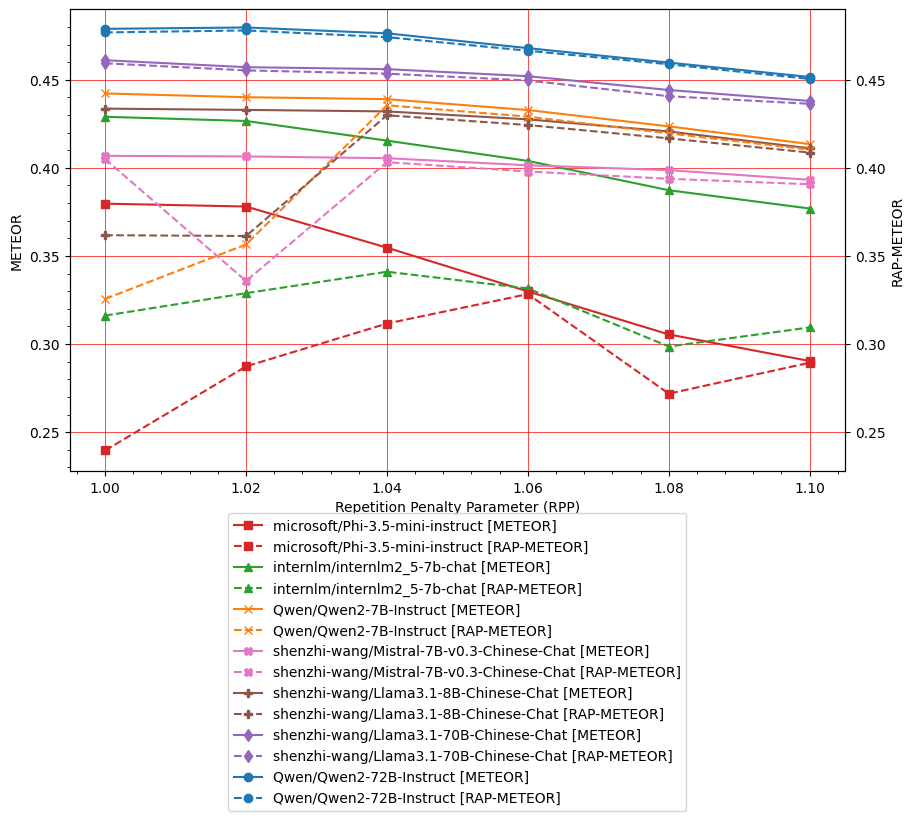

In [217]:
plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    ["meteor", "rap"],
    ["METEOR", "RAP-METEOR"],
    sync_y_axis=True,
)

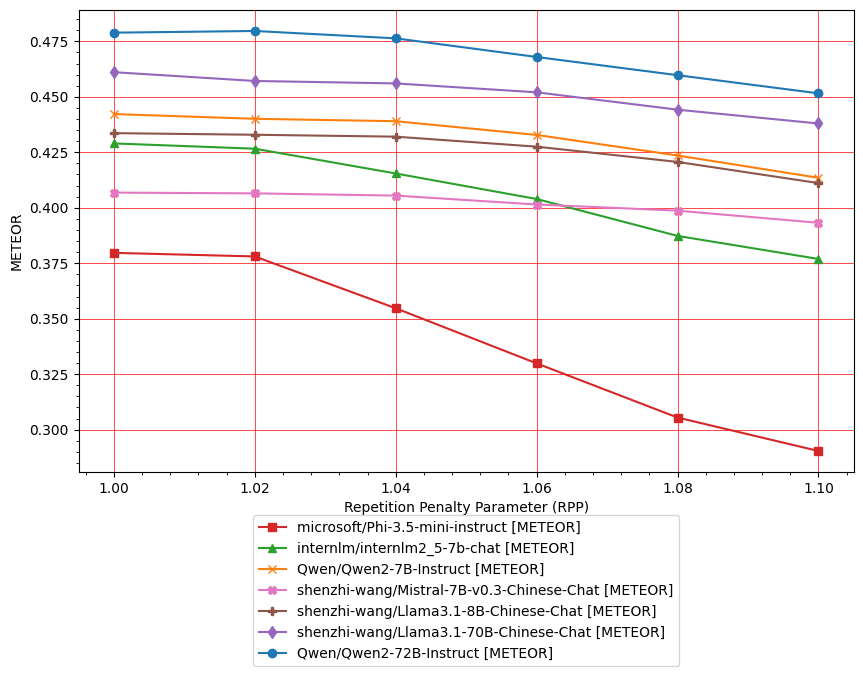

In [218]:
plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    ["meteor"],
    ["METEOR"],
)

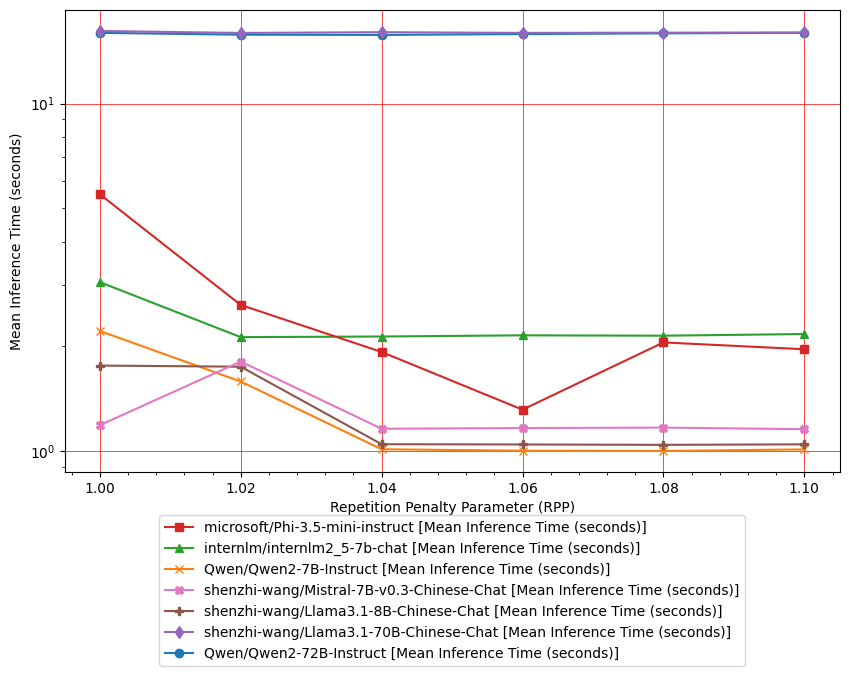

In [219]:
plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    ["eval_time"],
    ["Mean Inference Time (seconds)"],
    log_scales=[True],
)

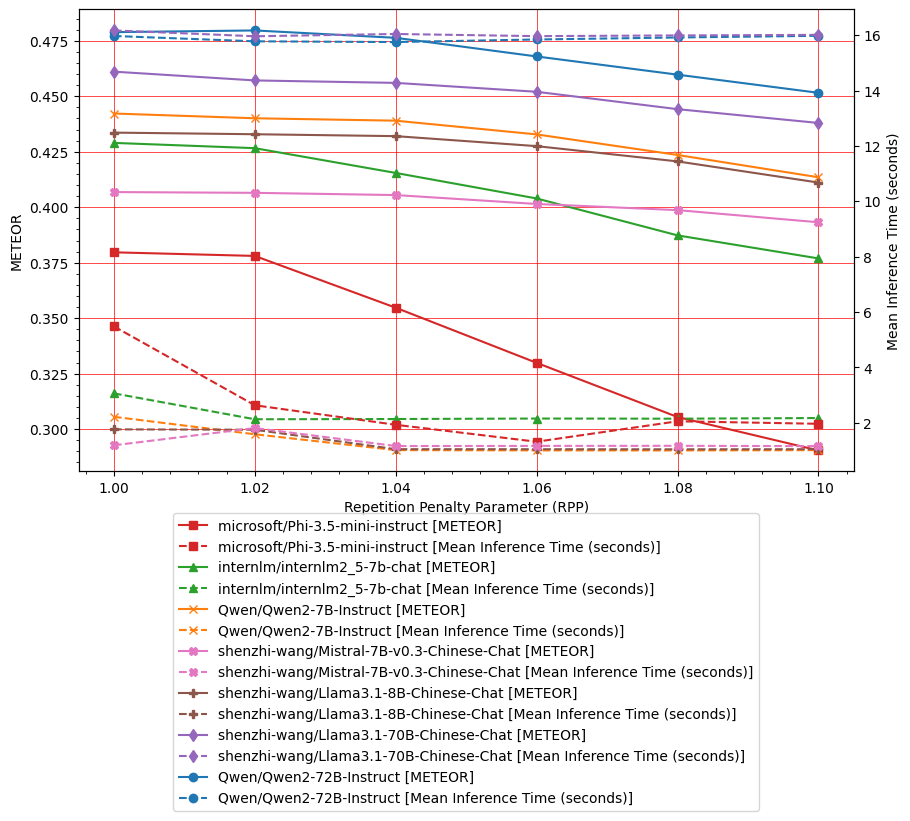

In [220]:
plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    ["meteor", "eval_time"],
    ["METEOR", "Mean Inference Time (seconds)"],
)

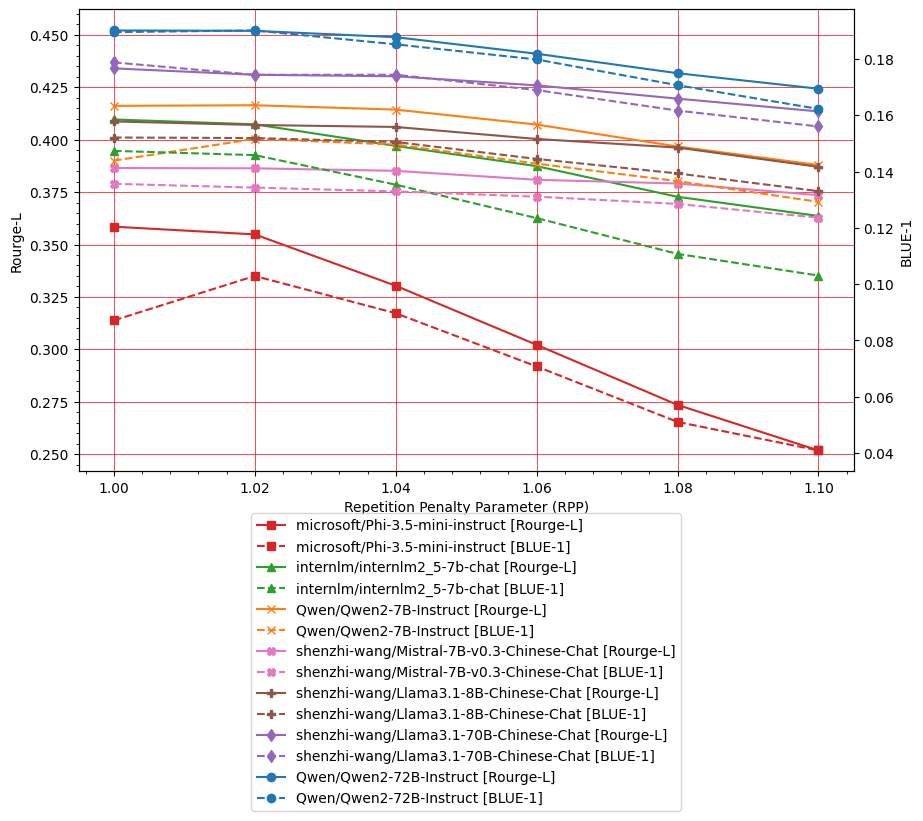

In [221]:
plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    ["rouge_l", "bleu_1"],
    ["Rourge-L", "BLUE-1"],
)

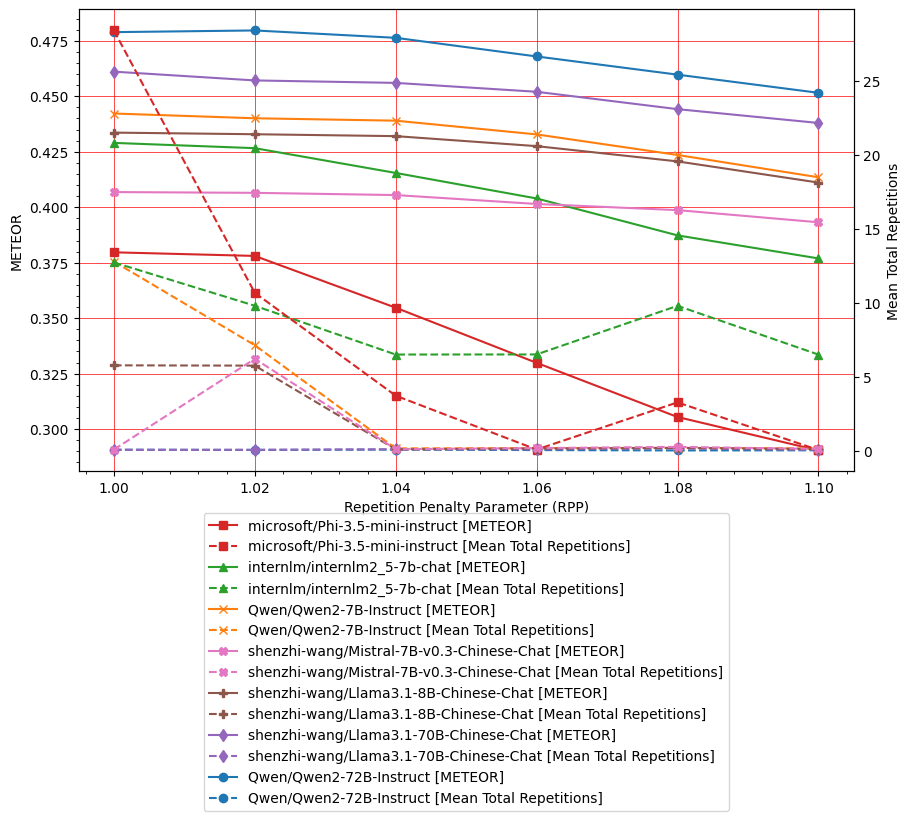

In [222]:
plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    ["meteor", "total_repetitions"],
    ["METEOR", "Mean Total Repetitions"],
)

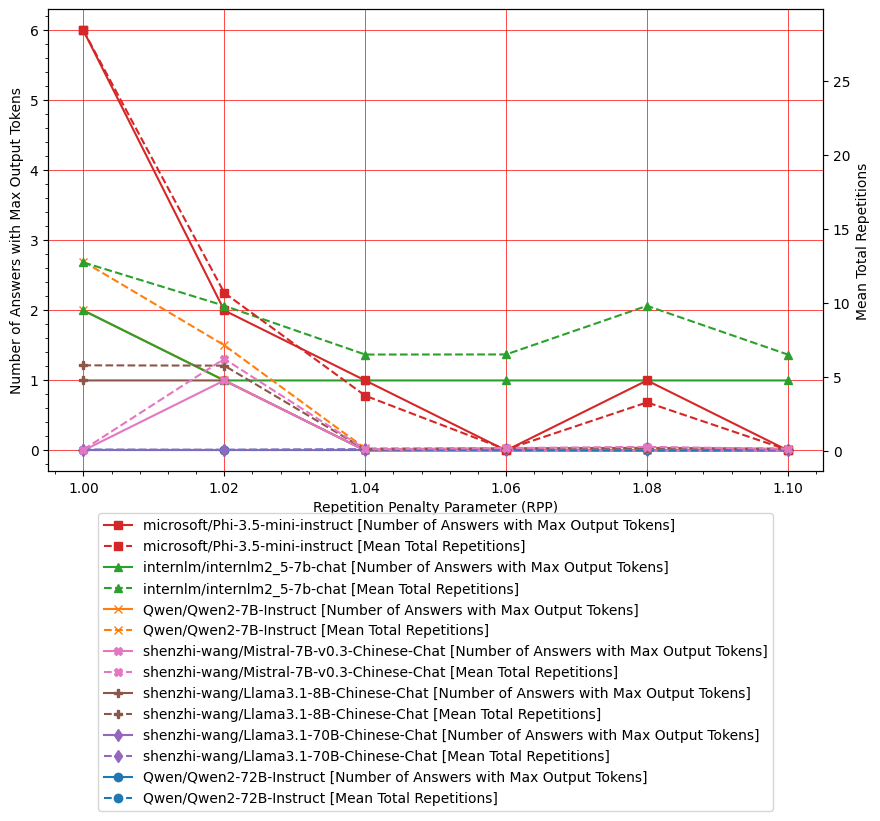

In [223]:
plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    ["num_max_output_tokens", "total_repetitions"],
    ["Number of Answers with Max Output Tokens", "Mean Total Repetitions"],
)

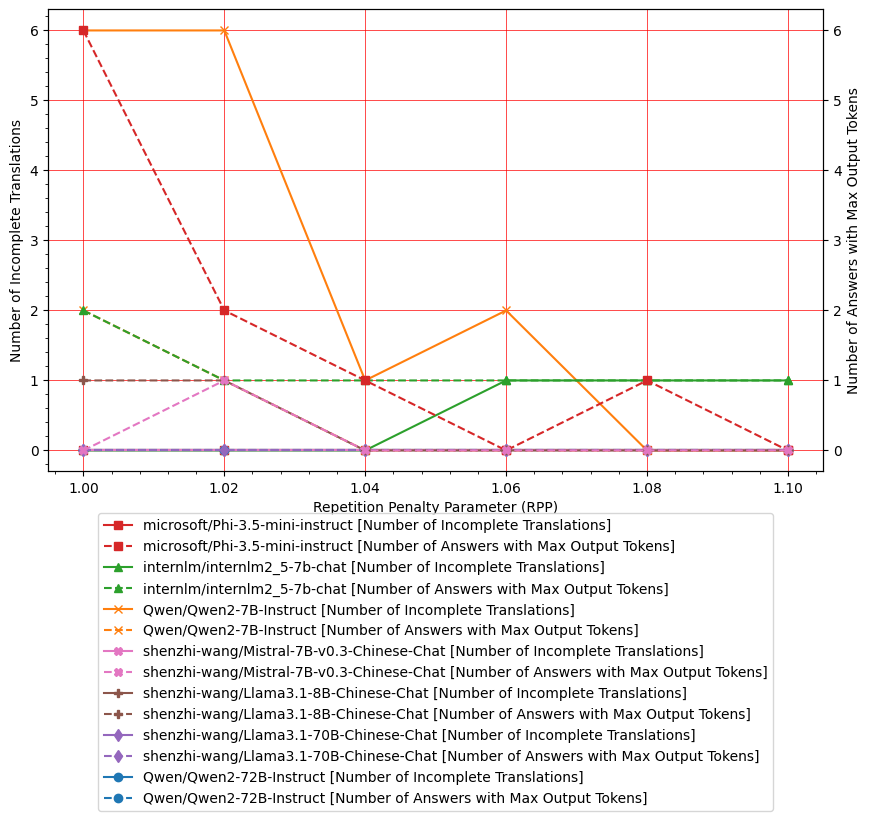

In [224]:
plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    ["num_incomplete_translations", "num_max_output_tokens"],
    ["Number of Incomplete Translations", "Number of Answers with Max Output Tokens"],
    sync_y_axis=True,
)

In [228]:
for col in result_columns:
    print(f"### Analyzing: {col}")
    analyze_translation_results(df, col, repetition_threshold=50, max_new_tokens=max_new_tokens)

### Analyzing: Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.00
*** Found 0 rows with total_repetitions > 50 for Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.00

*** Found 0 rows with output_tokens >= 2048 for Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.00

*** Found 0 rows with incomplete translations for Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.00
### Analyzing: Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.02
*** Found 0 rows with total_repetitions > 50 for Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.02

*** Found 0 rows with output_tokens >= 2048 for Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.02

*** Found 0 rows with incomplete translations for Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.02
### Analyzing: Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.04
*** Found 0 rows with total_repetitions > 50 for Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.04

*** Found 0 rows with output_tokens >= 2048 for Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.04

*** Found 0 rows with incomple

In [229]:
metrics_df.to_csv(results_path.replace(".csv", "_metrics.csv"), index=False)

In [230]:
metrics_df.describe()

meteor     spbleu     bleu_1    rouge_l  ews_score  \
count  42.000000  42.000000  42.000000  42.000000       42.0   
mean    0.418134  13.836401   0.138364   0.394038        0.0   
std     0.042615   3.443285   0.034433   0.043008        0.0   
min     0.290383   4.091959   0.040920   0.251727        0.0   
25%     0.402094  12.868566   0.128686   0.381957        0.0   
50%     0.427084  14.334512   0.143345   0.403238        0.0   
75%     0.443718  16.025109   0.160251   0.418829        0.0   
max     0.479684  19.013749   0.190137   0.452157        0.0   

       repetition_score  total_repetitions        rap  \
count         42.000000          42.000000  42.000000   
mean           3.324213           3.324213   0.387125   
std            5.606206           5.606206   0.065093   
min            0.047661           0.047661   0.239604   
25%            0.106355           0.106355   0.329550   
50%            0.186231           0.186231   0.404105   
75%            6.128420           6.128420   0.439585   
max           28.426302          28.426302   0.478005   

       num_incomplete_translations  num_max_output_tokens  eval_time  
count                    42.000000              42.000000  42.000000  
mean                      0.428571               0.547619   5.805279  
std                       1.327805               1.063872   6.542258  
min                       0.000000               0.000000   1.000883  
25%                       0.000000               0.000000   1.165931  
50%                       0.000000               0.000000   2.091350  
75%                       0.000000               1.000000  15.778906  
max                       6.000000               6.000000  16.178288